In [222]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
# Import Data
df = pd.read_csv('Data_Benzene_Reduced.csv', sep=";", header=None)
df.shape

(36, 50)

In [224]:
df.rename(columns={0: 'benzene', 1: 'eq_ratio'}, inplace=True)

In [225]:
grid_shape = (6,8) # new grid size wrt statement due to NaNs

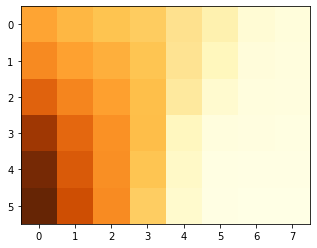

In [226]:
T = df.iloc[:,2:].to_numpy()
T_test = []
T_0 = np.flip(T[0,:].reshape(grid_shape),axis=0)
for i in range (T.shape[0]):
    T_reshaped = np.flip(T[i,:].reshape(grid_shape),axis=0)
    #print(T_reshaped)
    T_test.append(T_reshaped)
    #plt.imshow(T_reshaped, cmap='YlOrBr')
    #plt.show()
plt.imshow(T_0, cmap='YlOrBr')
#add legend
plt.show()    
T_test = np.array(T_test)
T = (T-np.mean(T,axis=0))/np.std(T,axis=0)

Text(0, 0.5, 'Variance ratio')

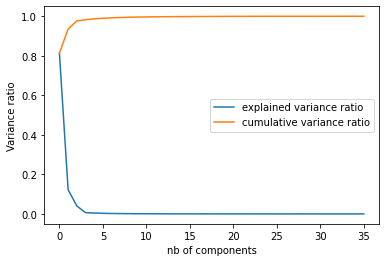

In [227]:
from sklearn.decomposition import PCA
index = 0
pca = PCA(n_components=36)
pca.fit(T)


explained_var_ratio = pca.explained_variance_ratio_
#plt.plot(explained_var_ratio)
#plt.show()


# plot of the explained variance by PCs and the cumulative variance ratio :  3 comp. explain up to 80% of the total variance
plt.plot(explained_var_ratio, label = "explained variance ratio")
plt.plot(np.cumsum(explained_var_ratio),label = "cumulative variance ratio")
plt.legend(loc="center right")
plt.xlabel('nb of components')
plt.ylabel('Variance ratio')

Text(0, 0.5, 'variance %')

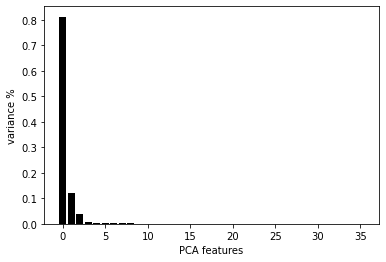

In [228]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
#plt.xticks(features)

(48, 36)


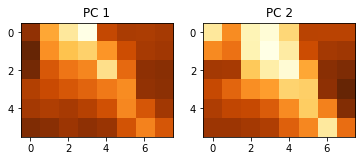

In [229]:
A = pca.components_.T
Z = T@A # X*A
print(A.shape)
X_reconstructed = Z[:,:36]@A[:,:36].T
X_reconstructed = (X_reconstructed + np.mean(T,axis=0))*np.std(T,axis=0)
n_pcs = 2
fig, axs = plt.subplots(1,n_pcs, figsize=(3*n_pcs, 3))
for i, ax in enumerate(axs):
    ax.imshow(X_reconstructed[i,:].reshape(grid_shape), cmap='YlOrBr') # to check, the flip
    ax.set_title('PC ' + str(i+1))

In [230]:
#loadings = pd.DataFrame(A[:,:2], columns=['PC1', 'PC2'])
loadings = pd.DataFrame(A[:,:2]*np.sqrt(explained_var_ratio[:2]), columns=['PC1', 'PC2'])
#loadings = pd.DataFrame(A[:,:2]*np.sqrt(explained_var_ratio[:2]/np.std(Z[:,:2],axis=0)), columns=['PC1', 'PC2'])
loadings.head()

,PC1,PC2
0,-0.137924,-0.012122
1,-0.134980,-0.006249
2,-0.129092,0.005764
3,-0.119635,0.025501
4,-0.134379,-0.027356


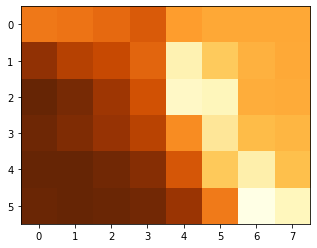

In [231]:
X_reconstructed = Z[:,:2]@A[:,:2].T
index = 0

# select the image and reshape it to show it
T_rec = X_reconstructed[index,:].reshape(grid_shape)
plt.imshow(T_rec, cmap='YlOrBr')
plt.show()

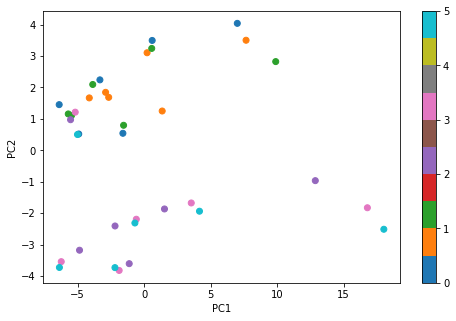

In [232]:
fig, ax = plt.subplots(figsize=(8,5))
im = ax.scatter(Z[:,0], Z[:,1],c=df.to_numpy()[:,0], cmap=plt.cm.get_cmap('tab10', 10), alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
fig.colorbar(im)
plt.show()

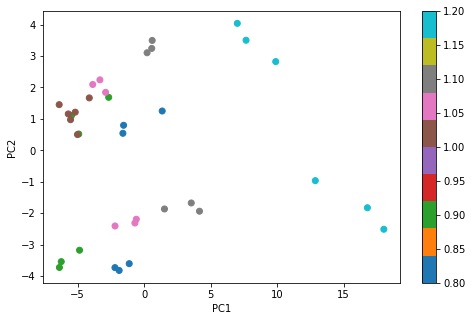

In [233]:
fig, ax = plt.subplots(figsize=(8,5))
im = ax.scatter(Z[:,0], Z[:,1],c=df.to_numpy()[:,1], cmap=plt.cm.get_cmap('tab10', 10), alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
fig.colorbar(im)
plt.show()

/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  # Remove the CWD from sys.path while we load stuff.


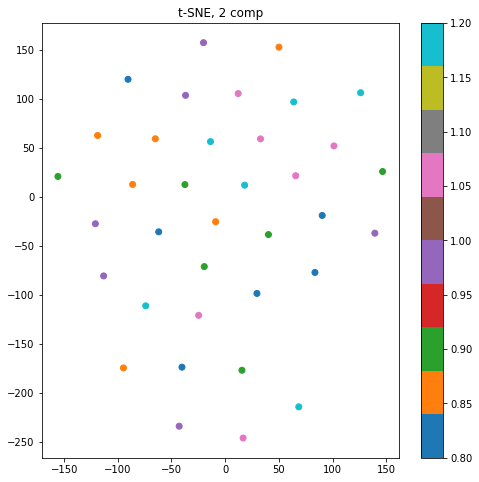

In [234]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components =2, perplexity = 30,init="pca")

X_2d = tsne.fit_transform(T)
X_2d.shape
fig, ax = plt.subplots(figsize=(8,8))

plt.title('t-SNE, 2 comp')
fig.colorbar(im)
im = ax.scatter(X_2d[:,0],X_2d[:,1],c=df.to_numpy()[:,0],cmap=plt.cm.get_cmap('tab10', 10), alpha=1)

In [235]:
from sklearn.manifold import Isomap

(36, 48)
(36, 2)


/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  


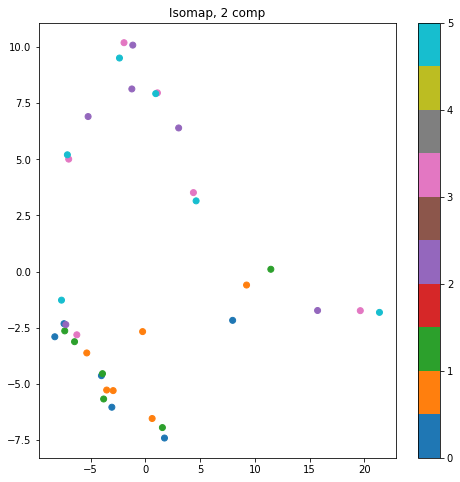

In [236]:
embedding = Isomap(n_components=2)
print(T.shape)
X_transformed = embedding.fit_transform(T)
print(X_transformed.shape)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Isomap, 2 comp')
fig.colorbar(im)
im = ax.scatter(X_transformed[:,0],X_transformed[:,1],c=df.to_numpy()[:,0:1],cmap=plt.cm.get_cmap('tab10', 10), alpha=1)

standard: 0.0078 sec
ltsa: 0.0082 sec
hessian: 0.012 sec
modified: 0.01 sec
ISO: 0.0022 sec
MDS: 0.019 sec
Spectral Embedding: 0.0074 sec
t-SNE: 0.29 sec


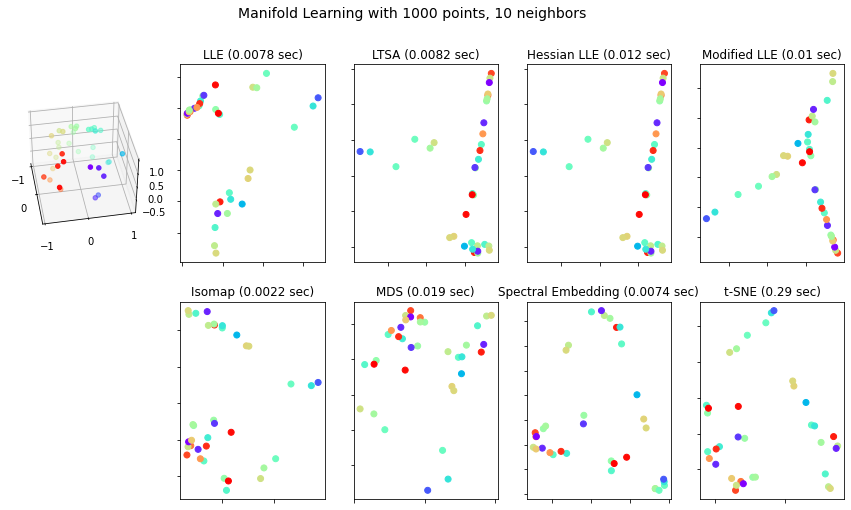

In [237]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings

# Variables for manifold learning.
n_neighbors = 10
n_samples = 51

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(T)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(T)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(T).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
trans_data = se.fit_transform(T).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
# TODO(1.2) Remove warning handling.
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore", message="The PCA initialization", category=FutureWarning
    )
    t0 = time()
    tsne = manifold.TSNE(
        n_components=2, init="pca", random_state=0, learning_rate="auto"
    )
    trans_data = tsne.fit_transform(T).T
    t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()

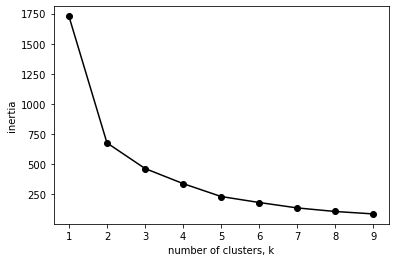

In [238]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(T)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

9


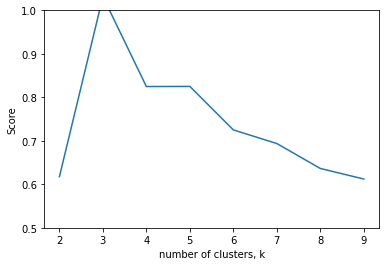

In [239]:
from sklearn.metrics import davies_bouldin_score
# to verify the number of clusters, 5 was chosen and verified a posteriori but the reverse yields so let's say we 
# did it the other way around
k_array = np.arange(2,10)
db_score_array = np.zeros((k_array.size,))
for i,k in enumerate(k_array):
    kmeans = KMeans(n_clusters = k, init = 'random')
    kmeans.fit(T)
    labels = kmeans.labels_
    db_score_array[i] = davies_bouldin_score(T, labels)
    
n_clusters = k_array[np.argmin(db_score_array)]
print(n_clusters)

plt.ylim(0.5,1)
plt.xlabel('number of clusters, k')
plt.ylabel('Score')
plt.plot(k_array,db_score_array)
plt.show()

## Cluster with benzene e eq ratio

In [240]:
df_xy = pd.read_csv('new_grid68.csv')
df_xy.head()
label = np.array(df_xy["Temperature"])
df_T_xy = df_xy.drop(['X','Y'], axis = 1) 
df_T_xy = df_T_xy.to_numpy()


kmeans  = KMeans(n_clusters=2,init='random')
kmeans.fit(T)
labels = kmeans.labels_
print(labels)
#print(df_T_xy)
print(T)

[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
[[ 5.24287166e-01 -1.74041294e-01 -5.63893581e-01 ...  2.48860708e-01
   1.97236033e-03  2.33093432e-01]
 [ 3.41734460e-01  6.63099756e-01  2.64078806e-01 ...  6.78501656e-01
   3.37555577e-01  7.59311886e-01]
 [ 1.23479938e-01  2.40624638e-01  5.10725977e-01 ... -1.92961225e-01
  -8.14724608e-01 -9.25185441e-01]
 ...
 [-3.13620713e+00 -2.86457330e+00 -2.84257309e+00 ... -2.65224215e+00
  -1.80746865e+00 -1.78227058e+00]
 [ 1.21930175e-01  2.19696931e-01  1.80549721e-01 ... -4.51187104e-02
   3.26100269e-01  2.36848657e-01]
 [ 5.41884332e-01  9.90326524e-02  3.32494820e-01 ...  9.19313366e-01
   4.63996386e-01  6.00716238e-01]]


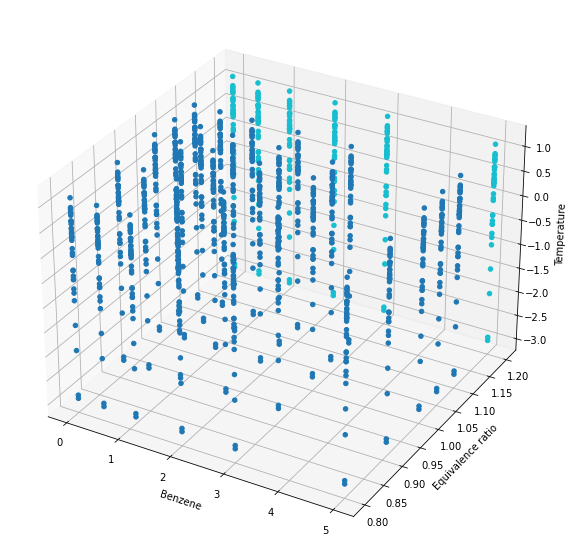

In [241]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
for i in range(len(T)) :
    im = ax.scatter(df.to_numpy()[:,0],df.to_numpy()[:,1],T[i,i],c=labels, cmap=plt.cm.get_cmap('tab10', 4), alpha=1)
ax.set_xlabel('Benzene')
ax.set_ylabel('Equivalence ratio')
ax.set_zlabel('Temperature')
plt.show()

# ROM

## Data preparation

### Scaling with max value

In [242]:
import tensorflow as tf
from sklearn.model_selection import train_test_split



data_reduced = pd.read_csv('RegressionNAN.csv')
maxscaled_data = data_reduced.copy()
max_value_col = maxscaled_data.max(axis=1).to_numpy() # keep max value of each column to be able to restore scaling
for i in range (5) :
    maxscaled_data.iloc[:,i] = maxscaled_data.iloc[:,i]/(max(data_reduced.iloc[:,i]))# to have between 0 and 1
    print(max(data_reduced.iloc[:,i]))
label = np.array(maxscaled_data["Temperature"])
columns = list(maxscaled_data.columns)
maxscaled_data_array = np.array(maxscaled_data.drop("Temperature", axis=1))

delta_temp = max(label)-min(label)

#split data in train and test, same for the label (T), need to shuffle it !
maxscaled_train_data, maxscaled_test_data, maxscaled_train_labels, maxscaled_test_labels = train_test_split(maxscaled_data_array, label, test_size = 0.20, random_state=10)



5.0
1.2
100
500
1647.8046212963


### Standard scaling

In [243]:
from sklearn.preprocessing import StandardScaler
# data_reduced = pd.read_csv('new_grid68.csv')
scaler = StandardScaler()
data_reduced_std = scaler.fit(data_reduced)
data_reduced_std = scaler.transform(data_reduced)
label_std = np.array(data_reduced_std[:,4])
#columns = list(data_reduced_std.columns)
data_reduced_array_std = np.array(data_reduced_std[:,:4])
print(label_std)
print(data_reduced_array_std)
delta_temp = max(label)-min(label)
std_train_data, std_test_data, std_train_labels, std_test_labels = train_test_split(data_reduced_array_std, label_std, test_size = 0.20, random_state=10)

[ 3.02599874  1.95553063  1.1280987  ... -0.102144   -0.33630878
 -0.71852793]
[[-1.15054017 -1.62665301 -1.13239702 -1.11765991]
 [-1.15054017 -1.62665301 -0.80297243 -1.11765991]
 [-1.15054017 -1.62665301 -0.63826014 -1.11765991]
 ...
 [ 1.81987334 -0.07745967  0.18530133  1.92835689]
 [ 1.81987334 -0.07745967  0.84415051  1.92835689]
 [ 1.81987334 -0.07745967  2.16184886  1.92835689]]


## Neural Network

In [244]:
import tensorflow as tf
from time import perf_counter, sleep

### Neural network with max scaling

In [245]:
# 1 input layer with the 4 inputs, 1 middle layer with 600 nodes and 1 output layer with 1 output (T)
# using different activation function, tanh in ouptput
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation='relu',input_dim=4))
model.add(tf.keras.layers.Dense(600, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='tanh'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_41 (Dense)             (None, 600)               3000      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 601       
Total params: 3,621
Trainable params: 3,621
Non-trainable params: 0
_________________________________________________________________


In [246]:
# mean squared error loss function (MSE)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['MeanSquaredError'])

In [247]:
history = model.fit(maxscaled_train_data, maxscaled_train_labels, 
                    epochs=8, 
                    validation_data=(maxscaled_test_data, maxscaled_test_labels))

Train on 2073 samples, validate on 519 samples
Epoch 1/8
2073/2073 [==============================] - 1s 647us/sample - loss: 0.0348 - MeanSquaredError: 0.0348 - val_loss: 0.0082 - val_MeanSquaredError: 0.0082
Epoch 2/8
2073/2073 [==============================] - 0s 155us/sample - loss: 0.0058 - MeanSquaredError: 0.0058 - val_loss: 0.0044 - val_MeanSquaredError: 0.0044
Epoch 3/8
2073/2073 [==============================] - 0s 163us/sample - loss: 0.0037 - MeanSquaredError: 0.0037 - val_loss: 0.0030 - val_MeanSquaredError: 0.0030
Epoch 4/8
2073/2073 [==============================] - 0s 174us/sample - loss: 0.0029 - MeanSquaredError: 0.0029 - val_loss: 0.0029 - val_MeanSquaredError: 0.0029
Epoch 5/8
2073/2073 [==============================] - 0s 170us/sample - loss: 0.0030 - MeanSquaredError: 0.0030 - val_loss: 0.0025 - val_MeanSquaredError: 0.0025
Epoch 6/8
2073/2073 [==============================] - 0s 171us/sample - loss: 0.0026 - MeanSquaredError: 0.0026 - val_loss: 0.0021 - val_

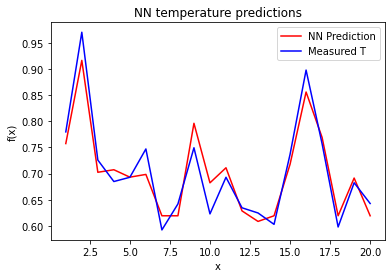

Time taken to execute code : 0.19610460801050067s
Predict : [2.8691342]% of error
Predict : [5.550494]% of error
Predict : [3.223887]% of error
Predict : [3.2982998]% of error
Predict : [0.0322578]% of error
Predict : [6.5285587]% of error
Predict : [4.5747404]% of error
Predict : [3.5333455]% of error
Predict : [6.2512197]% of error
Predict : [9.553658]% of error
Predict : [2.6307657]% of error
Predict : [0.93176717]% of error
Predict : [2.5887554]% of error
Predict : [2.7267537]% of error
Predict : [2.5872056]% of error
Predict : [4.6778975]% of error
Predict : [1.6025566]% of error
Predict : [3.5916486]% of error
Predict : [1.319456]% of error
Predict : [3.6569376]% of error


In [248]:
#predict value and plot the error percentage
start = perf_counter()
value = model.predict(maxscaled_test_data[0:20])
end = perf_counter()
x = range(1,21)
plt.plot(x, value, 'r', label='NN Prediction')
plt.plot(x, maxscaled_test_labels[:20], 'b', label='Measured T')
plt.title('NN temperature predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig("NN_1layer_600nodes_prediction_inter.png", dpi=72)
plt.show()

print(f"Time taken to execute code : {end-start}s") # time to predict the value, to be compared with the others
for i in range(len(value)):
    print(f"Predict : {abs((value[i]-maxscaled_test_labels[i])/(maxscaled_test_labels[i])*100)}% of error")

In [275]:
sample_fictif = [[1.12/5, 0.8/1.2, 5.0/100, 75.0/250]]
prediction_fictif = model.predict(sample_fictif)*1647.8046212963

print(prediction_fictif)

[[1337.4552]]


In [250]:
sample_fictif = [[0/5, 1.1/1.2, 80.0/100, 450/250 ]]
prediction_fictif = model.predict(sample_fictif)*1647.8046212963

print(prediction_fictif)

[[1192.6173]]


### Neural network with standard scaling

In [251]:
model_std = tf.keras.Sequential()
model_std.add(tf.keras.layers.Dense(4, activation='relu',input_dim=4))
model_std.add(tf.keras.layers.Dense(600, activation='relu'))
model_std.add(tf.keras.layers.Dense(1, activation='tanh'))
model_std.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_44 (Dense)             (None, 600)               3000      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 601       
Total params: 3,621
Trainable params: 3,621
Non-trainable params: 0
_________________________________________________________________


In [252]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_std.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['MeanSquaredError'])

In [253]:
history_std = model_std.fit(std_train_data, std_train_labels, 
                    epochs=15, 
                    validation_data=(std_test_data, std_test_labels))

Train on 2073 samples, validate on 519 samples
Epoch 1/15
2073/2073 [==============================] - 1s 683us/sample - loss: 0.4848 - MeanSquaredError: 0.4848 - val_loss: 0.3746 - val_MeanSquaredError: 0.3746
Epoch 2/15
2073/2073 [==============================] - 0s 158us/sample - loss: 0.2932 - MeanSquaredError: 0.2932 - val_loss: 0.2657 - val_MeanSquaredError: 0.2657
Epoch 3/15
2073/2073 [==============================] - 0s 172us/sample - loss: 0.2396 - MeanSquaredError: 0.2396 - val_loss: 0.2560 - val_MeanSquaredError: 0.2560
Epoch 4/15
2073/2073 [==============================] - 0s 183us/sample - loss: 0.2309 - MeanSquaredError: 0.2309 - val_loss: 0.2411 - val_MeanSquaredError: 0.2411
Epoch 5/15
2073/2073 [==============================] - 0s 221us/sample - loss: 0.2269 - MeanSquaredError: 0.2269 - val_loss: 0.2378 - val_MeanSquaredError: 0.2378
Epoch 6/15
2073/2073 [==============================] - 1s 376us/sample - loss: 0.2198 - MeanSquaredError: 0.2198 - val_loss: 0.2369 

Time taken to execute code : 0.20360942999832332s


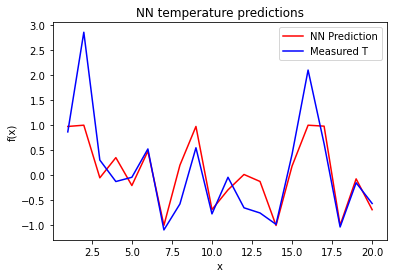

Predict : [12.522449]% of error
Predict : [64.960144]% of error
Predict : [116.033806]% of error
Predict : [386.42072]% of error
Predict : [426.11066]% of error
Predict : [8.282777]% of error
Predict : [8.373398]% of error
Predict : [135.60924]% of error
Predict : [77.2449]% of error
Predict : [11.112879]% of error
Predict : [650.1163]% of error
Predict : [102.66376]% of error
Predict : [83.71101]% of error
Predict : [2.2873287]% of error
Predict : [55.815243]% of error
Predict : [52.38021]% of error
Predict : [55.768585]% of error
Predict : [3.282332]% of error
Predict : [52.372433]% of error
Predict : [22.00353]% of error


In [254]:
start = perf_counter()
value = model_std.predict(std_test_data[0:20]) 
#value = StandardScaler().fit(value).inverse_transform(value)
end = perf_counter()
print(f"Time taken to execute code : {end-start}s")
x = range(1,21)
plt.plot(x, value, 'r', label='NN Prediction')
plt.plot(x, std_test_labels[:20], 'b', label='Measured T')
plt.title('NN temperature predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig("NN_std_prediction_inter.png", dpi=72)
plt.show()

for i in range(len(value)):
    print(f"Predict : {abs((value[i]-std_test_labels[i])/std_test_labels[i])*100}% of error")
    

### Multiple hidden layers

In [255]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split


# data_reduced = pd.read_csv('new_grid68.csv')

# #data_reduced = data_reduced.iloc[:,1:]
# # max_value_col = 0
# for i in range (5) :
#     # max_value_col = np.append(max_value_col,max(data_reduced.iloc[:,i]))
#     data_reduced.iloc[:,i] = data_reduced.iloc[:,i]/(max(data_reduced.iloc[:,i])) # to have between 0 and 1
# label = np.array(data_reduced["Temperature"])
# # max_value_col = max_value_col[1:] # to "save" the scaling 
# #print(max_value_col)
# columns = list(data_reduced.columns)
# data_reduced_array = np.array(data_reduced.drop("Temperature", axis=1))

# delta_temp = max(label)-min(label)

# train_data, test_data, train_labels, test_labels = train_test_split(data_reduced_array, label, test_size = 0.20, random_state=10)

In [256]:
#here we use 2 middle layers with 60 nodes each
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, activation='relu',input_dim=4))
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_47 (Dense)             (None, 60)                300       
_________________________________________________________________
dense_48 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 61        
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________


In [257]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
                loss='mse',
                metrics=['MeanSquaredError', 'accuracy'])

In [258]:
history = model.fit(maxscaled_train_data, maxscaled_train_labels, 
                    epochs=20, 
                    validation_data=(maxscaled_test_data, maxscaled_test_labels))

Train on 2073 samples, validate on 519 samples
Epoch 1/20
2073/2073 [==============================] - 2s 1ms/sample - loss: 0.0069 - MeanSquaredError: 0.0069 - accuracy: 4.8239e-04 - val_loss: 0.0029 - val_MeanSquaredError: 0.0029 - val_accuracy: 0.0000e+00
Epoch 2/20
2073/2073 [==============================] - 0s 183us/sample - loss: 0.0027 - MeanSquaredError: 0.0027 - accuracy: 4.8239e-04 - val_loss: 0.0021 - val_MeanSquaredError: 0.0021 - val_accuracy: 0.0000e+00
Epoch 3/20
2073/2073 [==============================] - 0s 186us/sample - loss: 0.0021 - MeanSquaredError: 0.0021 - accuracy: 4.8239e-04 - val_loss: 0.0024 - val_MeanSquaredError: 0.0024 - val_accuracy: 0.0000e+00
Epoch 4/20
2073/2073 [==============================] - 0s 182us/sample - loss: 0.0018 - MeanSquaredError: 0.0018 - accuracy: 4.8239e-04 - val_loss: 0.0015 - val_MeanSquaredError: 0.0015 - val_accuracy: 0.0000e+00
Epoch 5/20
2073/2073 [==============================] - 0s 175us/sample - loss: 0.0016 - MeanSquare

dict_keys(['loss', 'MeanSquaredError', 'accuracy', 'val_loss', 'val_MeanSquaredError', 'val_accuracy'])


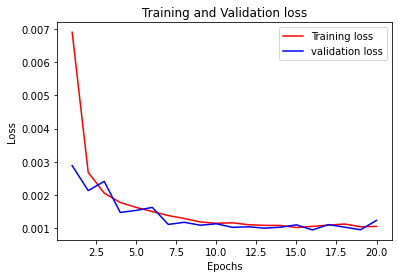

In [259]:
print(history.history.keys())
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("NN_2_lay_60_nodes_train_val_loss_inter.png", dpi=72)
plt.show()


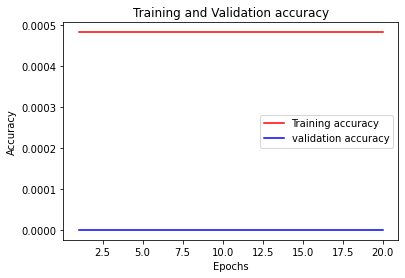

In [260]:
# need to change metrics to see sth coherent
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Time taken to execute code : 0.2884526059933705s


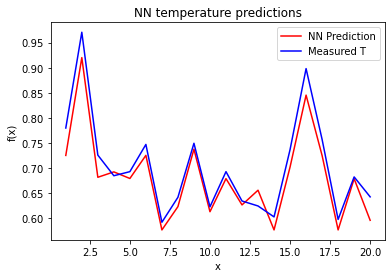

Predict : [7.001175]% of error
Predict : [5.2080398]% of error
Predict : [6.0866637]% of error
Predict : [1.1204019]% of error
Predict : [1.9654033]% of error
Predict : [2.9122956]% of error
Predict : [2.580436]% of error
Predict : [2.8995993]% of error
Predict : [1.5705729]% of error
Predict : [1.5590435]% of error
Predict : [2.0064526]% of error
Predict : [1.2278445]% of error
Predict : [5.025505]% of error
Predict : [4.30198]% of error
Predict : [4.708944]% of error
Predict : [5.8835053]% of error
Predict : [4.237532]% of error
Predict : [3.4962628]% of error
Predict : [0.5258591]% of error
Predict : [7.268161]% of error


In [261]:
start = perf_counter()
value = model.predict(maxscaled_test_data[:20])
end = perf_counter()
print(f"Time taken to execute code : {end-start}s")
x = range(1,21)
plt.plot(x, value, 'r', label='NN Prediction')
plt.plot(x, maxscaled_test_labels[:20], 'b', label='Measured T')
plt.title('NN temperature predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig("NN_2_lay_60_nodes_prediction_inter.png", dpi=72)
plt.show()

for i in range(len(value)):
    print(f"Predict : {abs((value[i]-maxscaled_test_labels[i])/(maxscaled_test_labels[i]))*100}% of error")

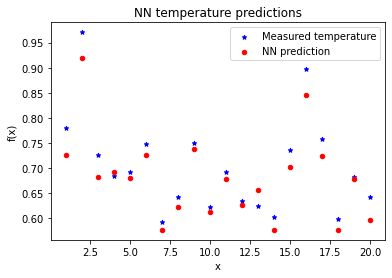

In [262]:
value = model.predict(maxscaled_test_data[:20])
x = range(1,21)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, maxscaled_test_labels[:20], s=20, c='b', marker="*", label='Measured temperature')
ax1.scatter(x,value, s=20, c='r', marker="o", label='NN prediction')
plt.legend(loc='best');
plt.title('NN temperature predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [263]:
sample_fictif = [[8], [0.8], [5], [75]]
sample_fictif = np.array(sample_fictif).transpose()
sample_fictif = np.divide(sample_fictif,max_value_col[:4])
test = model.predict(sample_fictif)
test = np.multiply(test,max_value_col[4])
print(test)

[[1006.7422]]


In [264]:
sample_fictif = [[0], [1.1], [80], [450]]
sample_fictif = np.array(sample_fictif).transpose()
sample_fictif = np.divide(sample_fictif,max_value_col[:4])
test = model.predict(sample_fictif)
test = np.multiply(test,max_value_col[4])
print(test)

[[896.60626]]


## Random Forest

In [265]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [266]:
# Read the csv file containing the Benzene,eq_ratio,x,y,temp

data_reduced = pd.read_csv('RegressionNAN.csv')
#data_reduced = data_reduced.iloc[:,1:]

label = np.array(data_reduced["Temperature"])
columns = list(data_reduced.columns)
data_reduced_array = np.array(data_reduced.drop("Temperature", axis=1))

delta_temp = max(label)-min(label)

print(columns)
print(label)
print(data_reduced_array)

['Benzene', 'eq_ratio', 'X', 'Y', 'Temperature']
[1626.82316471 1457.39634028 1326.43572281 ... 1131.72080108 1094.65870208
 1034.16350815]
[[  0.    0.8   0.   70. ]
 [  0.    0.8  10.   70. ]
 [  0.    0.8  15.   70. ]
 ...
 [  5.    1.   40.  500. ]
 [  5.    1.   60.  500. ]
 [  5.    1.  100.  500. ]]


In [267]:
# Split the data into 80% training and 20% testing with their corresponding label

train_data, test_data, train_labels, test_labels = train_test_split(data_reduced_array, label, test_size = 0.20, random_state=10)


print(train_data)
print(train_labels)
print(f"Train size : {len(train_labels)} and test size : {len(test_labels)}")

[[  1.12   0.91  15.   500.  ]
 [  5.     0.91 100.   100.  ]
 [  5.     1.    40.   100.  ]
 ...
 [  2.     0.8    0.   300.  ]
 [  0.5    0.91 100.   100.  ]
 [  1.12   1.    10.   500.  ]]
[1153.04267778 1002.99078704 1006.68516175 ... 1158.81593745  974.38500476
 1200.65139062]
Train size : 2073 and test size : 519


In [268]:
# Calculate for different numbers of forests with different parameters to select the best one

n_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
perc = []

best_error_percentage = 100
rf_saved = 0
for elem in n_estimators :
    rf = RandomForestRegressor(n_estimators=elem)
    rf.fit(train_data, train_labels)
    predictions = rf.predict(test_data)
    error_mean = round( np.mean(abs(predictions - test_labels)),2 )
    percentage = round( (error_mean/delta_temp)*100, 3)
    perc.append(percentage)
    print(f"Error in degrees celsius with {elem} tree(s): {percentage} % which is around {error_mean}°")
    # Save the  best tree
    if best_error_percentage > percentage :
        best_error_percentage = percentage
        rf_saved = rf

print(f"Best one has an error of {best_error_percentage}%")


Error in degrees celsius with 1 tree(s): 1.634 % which is around 12.54°
Error in degrees celsius with 10 tree(s): 1.199 % which is around 9.2°
Error in degrees celsius with 20 tree(s): 1.199 % which is around 9.2°
Error in degrees celsius with 30 tree(s): 1.149 % which is around 8.82°
Error in degrees celsius with 40 tree(s): 1.152 % which is around 8.84°
Error in degrees celsius with 50 tree(s): 1.128 % which is around 8.66°
Error in degrees celsius with 60 tree(s): 1.117 % which is around 8.57°
Error in degrees celsius with 70 tree(s): 1.098 % which is around 8.43°
Error in degrees celsius with 80 tree(s): 1.157 % which is around 8.88°
Error in degrees celsius with 90 tree(s): 1.137 % which is around 8.73°
Error in degrees celsius with 100 tree(s): 1.12 % which is around 8.6°
Best one has an error of 1.098%


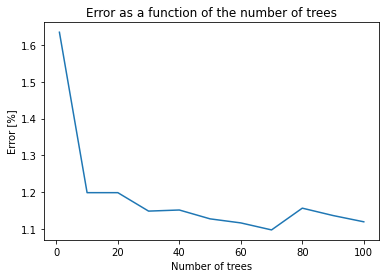

In [269]:
plt.plot(n_estimators, perc)
plt.title('Error as a function of the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error [%]')
plt.savefig("RF_n_trees_error_inter", dpi=72)
plt.show()

Time taken to execute code : 0.027238009992288426s


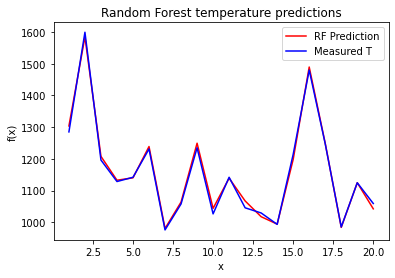

In [270]:
start = perf_counter()
value = rf.predict(test_data[:20])
end = perf_counter()
print(f"Time taken to execute code : {end-start}s")
x = range(1,21)
fig = plt.figure()
plt.plot(x, value, 'r', label='RF Prediction')
plt.plot(x, test_labels[:20], 'b', label='Measured T')
plt.title('Random Forest temperature predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig("Random_forest_prediction_inter.png", dpi=72)
plt.show()


In [271]:
sample_fictif = [8, 0.8, 5.0, 75.0 ]
prediction_fictif = rf_saved.predict([sample_fictif])

print(prediction_fictif)

[1637.24633269]


In [272]:
sample_fictif = [0., 1.1, 80.0, 450. ]
prediction_fictif = rf_saved.predict([sample_fictif])

print(prediction_fictif)

[1022.36772415]


1264.0385189814835
Ratio of element before threshold (low temp) [%]: 80.2854938271605


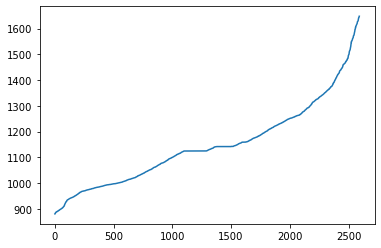

In [273]:
data_reduced = pd.read_csv('RegressionNAN.csv')
#data_reduced = data_reduced.iloc[:,1:]

label = np.array(data_reduced["Temperature"])
columns = list(data_reduced.columns)
data_reduced_array = np.array(data_reduced.drop("Temperature", axis=1))


threshold = min(label) + (max(label)-min(label))/2
print(threshold)

y=[i for i in range(len(label))]

counter = 0
label.sort()
for elem in label:
    if elem < threshold :
        counter+=1
print(f"Ratio of element before threshold (low temp) [%]: {(counter/len(label))*100}")
plt.plot(y,label)